In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm,Normalize
import seaborn as sns
import re
data_dir = 'path/to/Simulated_Tempering_Logs'

# A13 Laplacian Centrality by Residue

In [3]:
A13=[]
p = re.compile(r'\d+\.\d+')
f = open('{data_dir}/without_minus/A13_dLC_probs.log','r')
lines = f.readlines()
for line in lines:
    A13.append(np.array([float(i) for i in p.findall(line)]))
A13 = np.array(A13)
A13_energy = pd.read_csv(f'{data_dir}/A13out100Msteps.traj',delim_whitespace=True)
labels = list(np.load('../../data/contacts/A13_contacts.npy',allow_pickle=True).item().keys())

In [4]:
import tqdm
beta = 0.593**-1

null_idx = np.where(A13_energy['k']==5)
#null = [kl[i] for i in null_idx[0]]
bman_idx = np.where(A13_energy['k']==0)
#bman = [kl[i] for i in bman_idx[0]]
#vals=list(np.exp(-beta*A13_energy['energy'].values))
#w = [vals[i] for i in bman_idx[0]]
pops = A13[1:]
null_idx = np.where(A13_energy['k']==5)
null = [pops[i] for i in null_idx[0]]
null = np.vstack(null)
weights = np.ones((40,len(pops)))*np.exp(-beta*A13_energy['energy'].values)
weights = weights.T

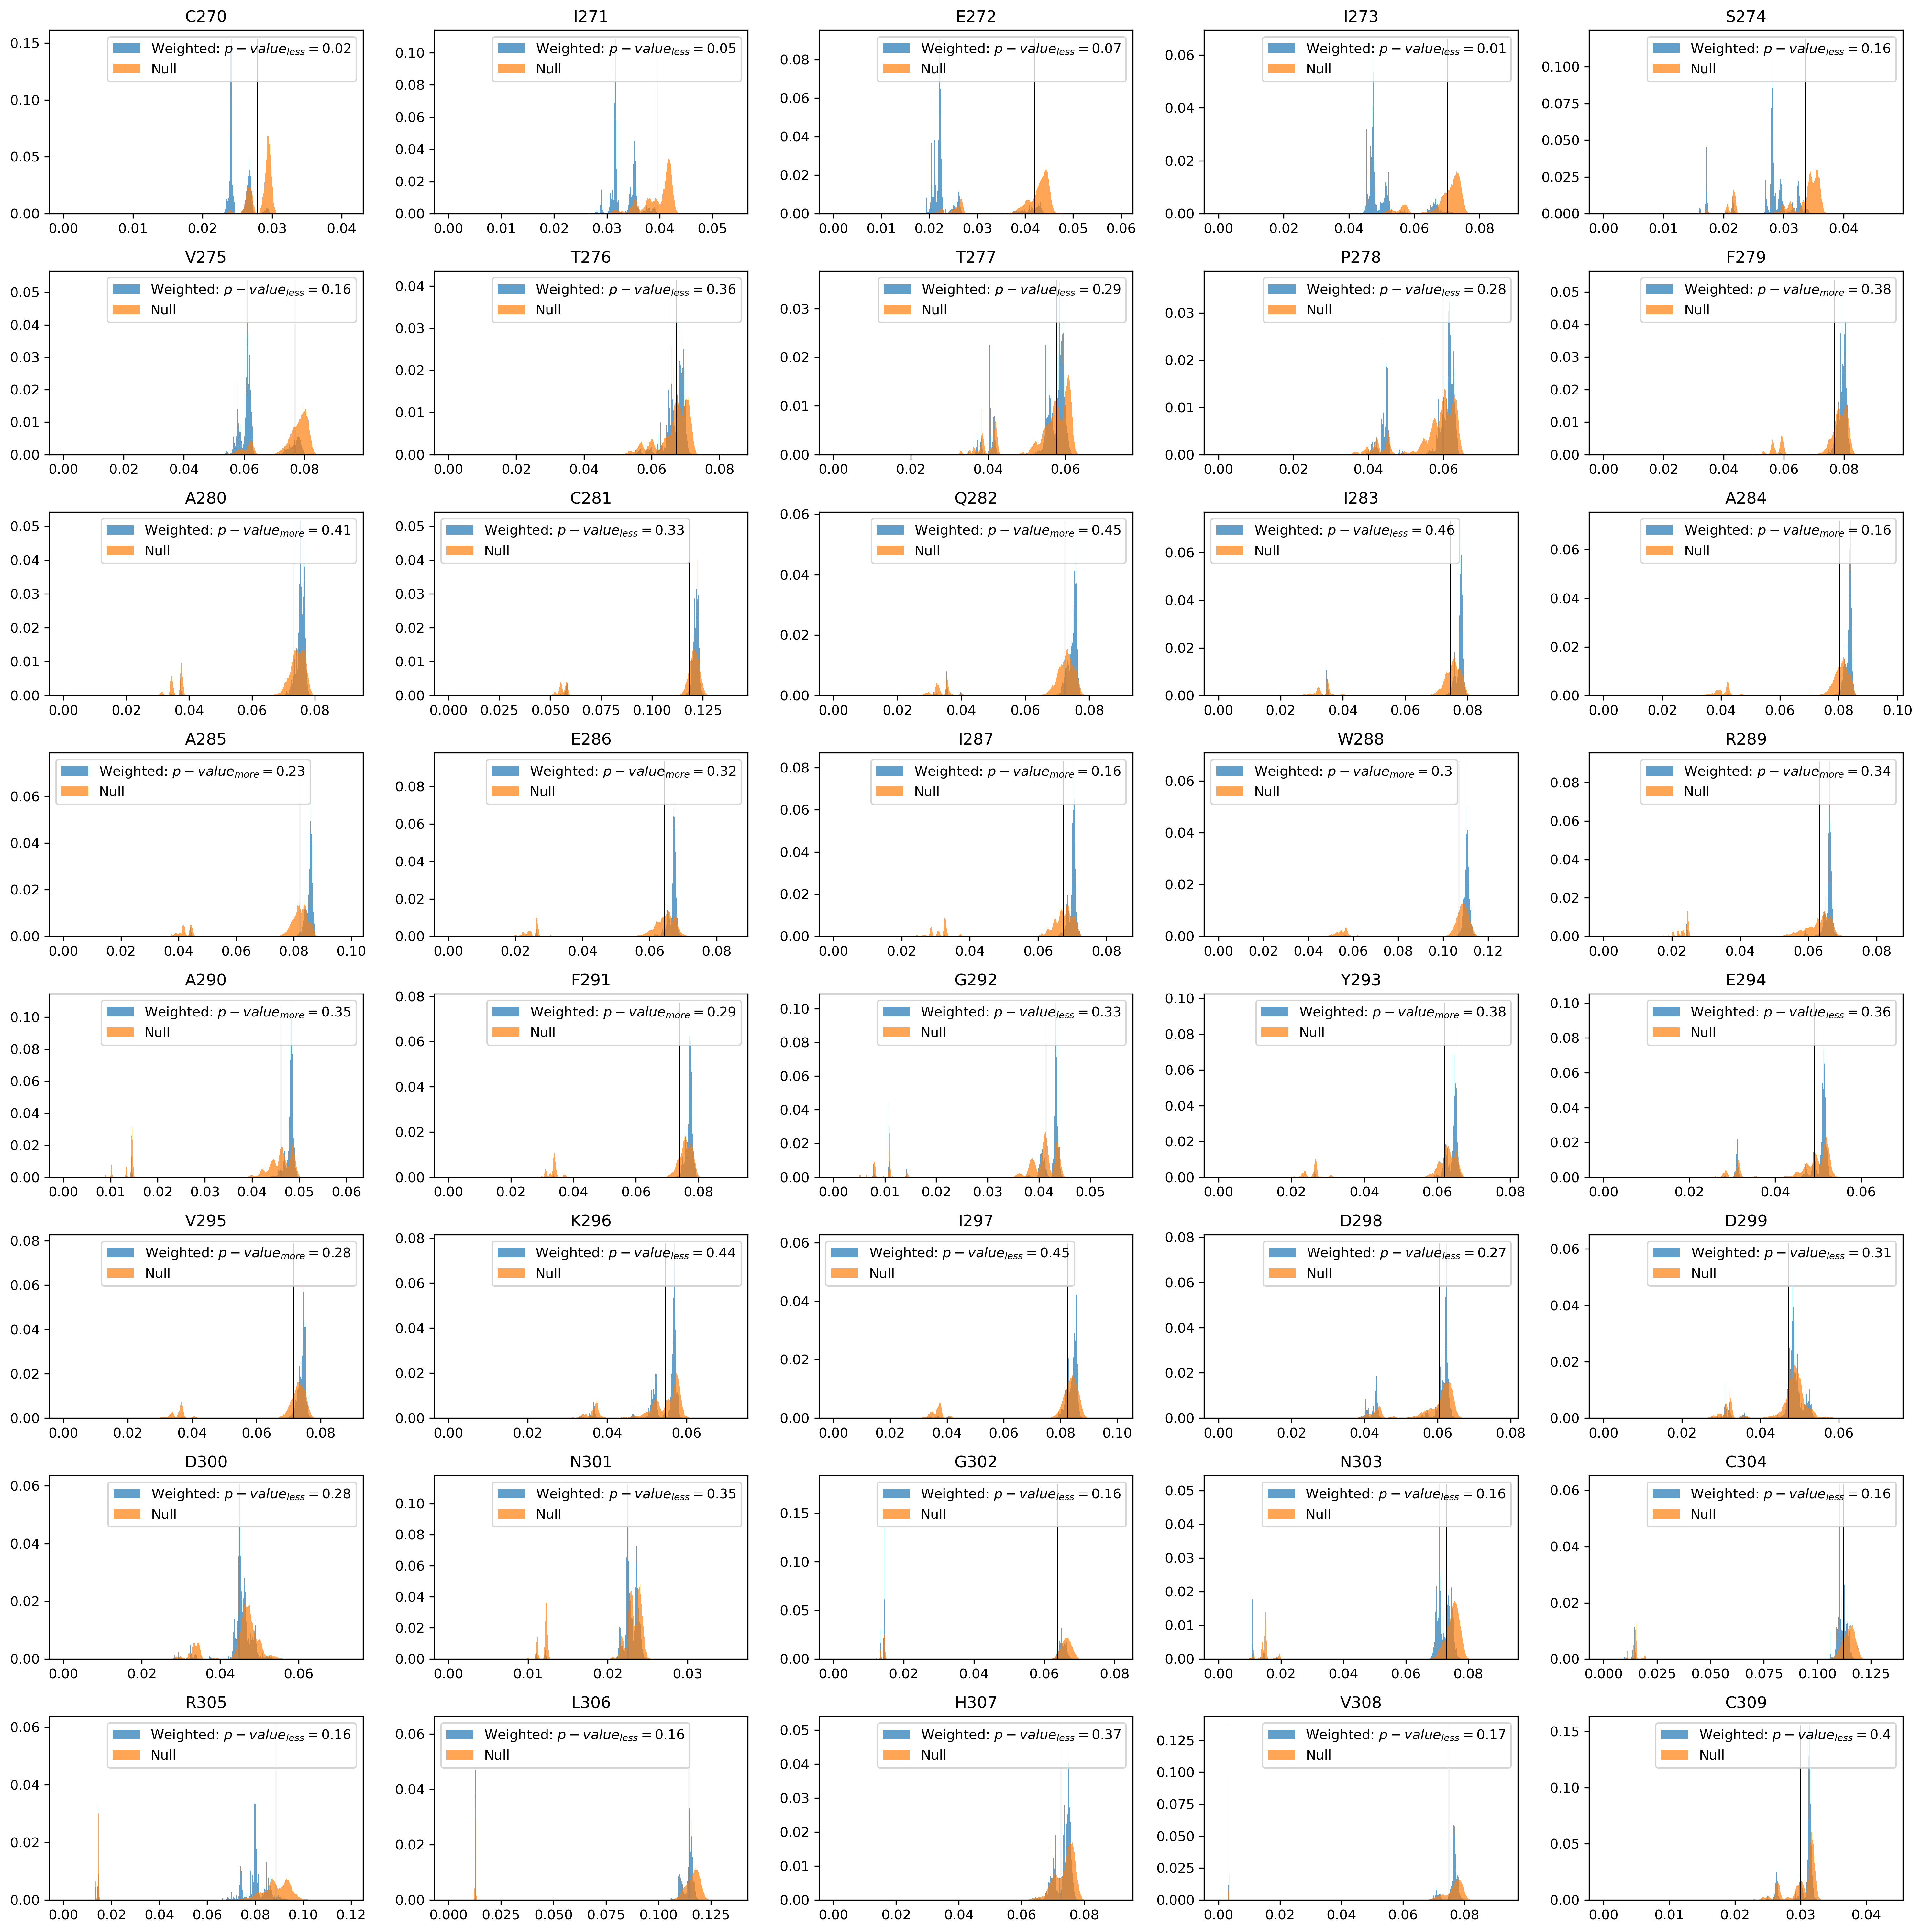

In [5]:
fig,axes = plt.subplots(8,5,figsize=(20,20),dpi=300)
#bins=np.arange(-0.15,10.01,0.0001)
for i,ax in enumerate(axes.flat):
    ax.set_title(labels[i])
    x=pops[:,i]
    n=null[:,i]
    bins=np.arange(0,max(x)+0.01,0.0001)
    m = np.mean(x)
    s = np.var(x)
    #x=np.clip(x,0,0.5)
    h1,bins = np.histogram(x,bins=bins,weights=weights[:,i]/sum(weights[:,i]))
    w=np.ones(len(n))*(1/len(n))
    nh,nh_bins = np.histogram(n,bins=bins,weights=w)
    weighted_average = np.average(x,weights=weights[:,i]/sum(weights[:,i]))
    p_less = round(len(n[n<weighted_average])/len(n),2)
    p_more = round(len(n[n>weighted_average])/len(n),2)
    if p_less < p_more:
        label = 'Weighted: $p-value_{less}=$'+f'{p_less}'
    else:
        label = 'Weighted: $p-value_{more}=$'+f'{p_more}'
    ax.hist(x=x,bins=bins,label=label,weights=weights[:,i]/sum(weights[:,i]),histtype='bar',alpha=0.7)
    ax.hist(x=n,bins=bins,label='Null',weights=w/sum(w),histtype='bar',alpha=0.7)
    #ax.set_yscale('log')
    #ax.set_xlim(0,0.21)
    nm = max(nh)
    hm = max(h1)
    if nm > hm:
        m=nm
    else:
        m=hm
    ax.vlines(A13[0][i],0,m,color='k',linewidth=0.5)
    ax.legend()
fig.tight_layout()
fig.savefig('A13_laplacian_centrality.png',dpi=300)